In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory

# dataset folder reading
dataset_dir ='/kaggle/input/lemon-leaf-disease-dataset-lldd/Original Dataset'

#initailizing batch and image dim
batch_size = 32
img_size = (224, 224)

full_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    dataset_dir,
    image_size=img_size,
    batch_size=batch_size,
    label_mode='categorical',
    shuffle=True,
    seed=7
)

NotFoundError: Could not find directory /kaggle/input/lemon-leaf-disease-dataset-lldd/Original Dataset

In [ ]:
train_size = int(0.8 * len(full_dataset))
val_size = int(0.1 * len(full_dataset))
test_size = len(full_dataset) - train_size - val_size

train_dataset = full_dataset.take(train_size)
val_dataset = full_dataset.skip(train_size).take(val_size)
test_dataset = full_dataset.skip(train_size + val_size).take(test_size)

print(f"Train batches: {len(train_dataset)}")
print(f"Validation batches: {len(val_dataset)}")
print(f"Test batches: {len(test_dataset)}")

Train batches: 34
Validation batches: 4
Test batches: 5


In [ ]:
Dara_dir = "/kaggle/input/lemon-leaf-disease-dataset-lldd/Original Dataset"

In [ ]:
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

In [ ]:
LOCAL_WEIGHTS_PATH = "/kaggle/input/mobilenet/keras/default/1/mobilenet_1_0_224_tf_no_top.h5"

In [ ]:
base_model = MobileNet(
    weights=None, 
    include_top=False, 
    input_shape=(224, 224, 3)
)
base_model.load_weights(LOCAL_WEIGHTS_PATH)

In [ ]:
for layer in base_model.layers[:80]:
    layer.trainable = False
for layer in base_model.layers[80:]:
    layer.trainable = True

# 4) Build your head
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(len(full_dataset.class_names), activation='softmax')(x)

In [ ]:
model = Model(inputs=base_model.input, outputs=predictions)
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_8 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1 (Conv2D)                       │ (None, 112, 112, 32)        │             864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1_bn (BatchNormalization)        │ (None, 112, 112, 32)        │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1_relu (ReLU)                    │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_1 (DepthwiseConv2D)          │ (None, 112, 112, 32)        │             288 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_1_bn (BatchNormalization)    │ (None, 112, 112, 32)        │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_1_relu (ReLU)                │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_1 (Conv2D)                   │ (None, 112, 112, 64)        │           2,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_1_bn (BatchNormalization)    │ (None, 112, 112, 64)        │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_1_relu (ReLU)                │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pad_2 (ZeroPadding2D)           │ (None, 113, 113, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_2 (DepthwiseConv2D)          │ (None, 56, 56, 64)          │             576 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_2_bn (BatchNormalization)    │ (None, 56, 56, 64)          │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_2_relu (ReLU)                │ (None, 56, 56, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_2 (Conv2D)                   │ (None, 56, 56, 128)         │           8,192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_2_bn (BatchNormalization)    │ (None, 56, 56, 128)         │             512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_2_relu (ReLU)                │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_3 (DepthwiseConv2D)          │ (None, 56, 56, 128)         │           1,152 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_3_bn (BatchNormalization)    │ (None, 56, 56, 128)         │             512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_3_relu (ReLU)                │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_3 (Conv2D)                   │ (None, 56, 56, 128)         │          16,384 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 4,287,689 (16.36 MB)

 Trainable params: 2,120,713 (8.09 MB)

 Non-trainable params: 2,166,976 (8.27 MB)

In [ ]:
history = model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=30,
    batch_size=batch_size
)

Epoch 1/30
34/34 ━━━━━━━━━━━━━━━━━━━━ 65s 2s/step - accuracy: 0.4285 - loss: 1.7196 - val_accuracy: 0.3594 - val_loss: 2.0374
Epoch 2/30
34/34 ━━━━━━━━━━━━━━━━━━━━ 50s 1s/step - accuracy: 0.8888 - loss: 0.4501 - val_accuracy: 0.3359 - val_loss: 1.8921
Epoch 3/30
34/34 ━━━━━━━━━━━━━━━━━━━━ 47s 1s/step - accuracy: 0.9627 - loss: 0.2299 - val_accuracy: 0.4453 - val_loss: 1.3439
Epoch 4/30
34/34 ━━━━━━━━━━━━━━━━━━━━ 52s 2s/step - accuracy: 0.9868 - loss: 0.1507 - val_accuracy: 0.7500 - val_loss: 0.6865
Epoch 5/30
34/34 ━━━━━━━━━━━━━━━━━━━━ 50s 1s/step - accuracy: 0.9948 - loss: 0.0908 - val_accuracy: 0.8203 - val_loss: 0.3979
Epoch 6/30
34/34 ━━━━━━━━━━━━━━━━━━━━ 46s 1s/step - accuracy: 0.9975 - loss: 0.0678 - val_accuracy: 0.9141 - val_loss: 0.3021
Epoch 7/30
34/34 ━━━━━━━━━━━━━━━━━━━━ 44s 1s/step - accuracy: 0.9987 - loss: 0.0522 - val_accuracy: 0.9609 - val_loss: 0.2006
Epoch 8/30
34/34 ━━━━━━━━━━━━━━━━━━━━ 47s 1s/step - accuracy: 0.9950 - loss: 0.0502 - val_accuracy: 0.9531 - val_loss:

In [ ]:
test_loss, test_acc = model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc}")

5/5 ━━━━━━━━━━━━━━━━━━━━ 8s 788ms/step - accuracy: 0.9945 - loss: 0.0191
Test accuracy: 0.9927536249160767


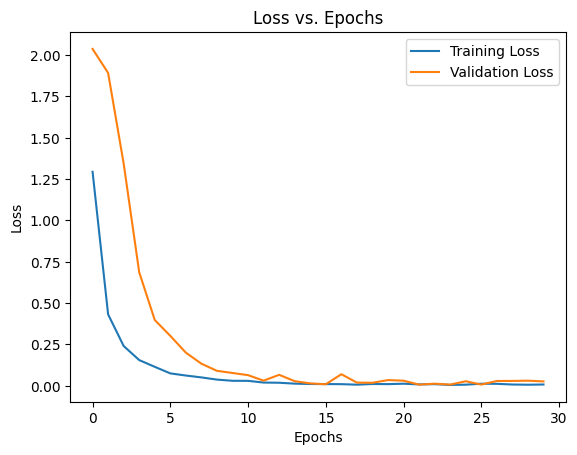

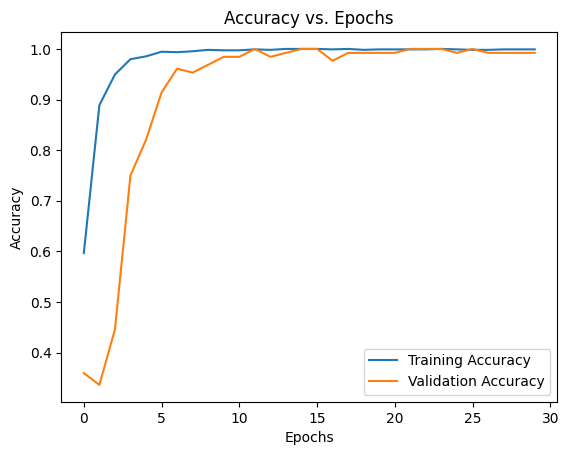

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss vs. Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy vs. Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
model.save_weights('/kaggle/working/my_model_weights.weights.h5')

In [ ]:
model.save('/kaggle/working/my_full_model.h5')

In [ ]:
model.save('/kaggle/working/my_saved_model.keras')

In [ ]:
base_model = MobileNet(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

for layer in base_model.layers[:80]:
    layer.trainable = False
for layer in base_model.layers[80:]:
    layer.trainable = True

# 4) Build your head
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(len(full_dataset.class_names), activation='softmax')(x).trainable = False
for layer in base_model.layers[80:]:
    layer.trainable = True

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(len(full_dataset.class_names), activation='softmax')(x)

Exception: URL fetch failure on https://storage.googleapis.com/tensorflow/keras-applications/mobilenet/mobilenet_1_0_224_tf_no_top.h5: None -- [Errno -3] Temporary failure in name resolution